In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import keras 
import sklearn

/Users/guptadhruv51/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_data=pd.read_excel('./Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.shape

(10683, 11)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [5]:
train_data[train_data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
train_data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [7]:
test_data=pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
test_data.shape

(2671, 10)

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


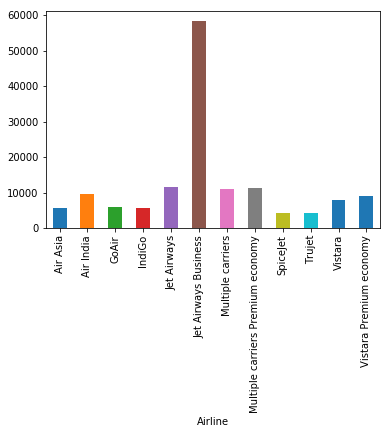

In [10]:
train_data.groupby('Airline')['Price'].mean().plot(kind='bar')

In [11]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

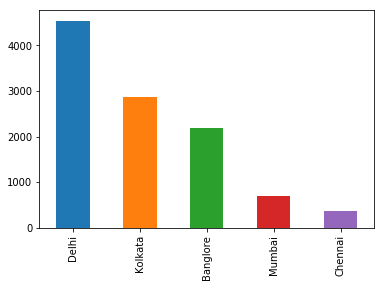

In [12]:
train_data['Source'].value_counts().plot(kind='bar')

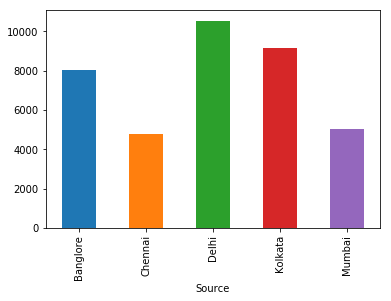

In [13]:
train_data.groupby('Source')['Price'].mean().plot(kind='bar')

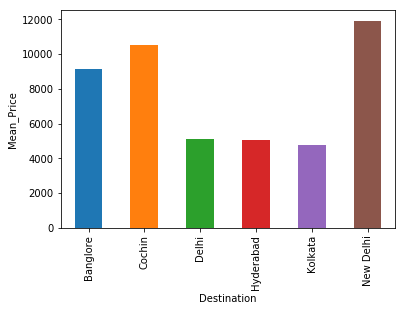

In [14]:
train_data.groupby('Destination')['Price'].mean().plot(kind='bar')
plt.ylabel('Mean_Price')
plt.show()

In [15]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [16]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [17]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [18]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [19]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [21]:
train_data['Date_of_Journey']=train_data['Date_of_Journey'].map(lambda x: pd.Timestamp(x).weekday())
train_data['Date_of_Journey'].replace(to_replace=[0,1,2,3,4,5,6],
                                     value=['Monday','Tuesday','Wednesday',
                                           'Thursday','Friday','Saturday','Sunday']
                                     ,inplace=True)

test_data['Date_of_Journey']=test_data['Date_of_Journey'].map(lambda x: pd.Timestamp(x).weekday())
test_data['Date_of_Journey'].replace(to_replace=[0,1,2,3,4,5,6],
                                     value=['Monday','Tuesday','Wednesday',
                                           'Thursday','Friday','Saturday','Sunday']
                                     ,inplace=True)

In [22]:
train_data['Dep_Time']=train_data['Dep_Time'].map(lambda x: int(str(x).split(':')[0])*100+int(str(x).split(':')[1]))
test_data['Dep_Time']=test_data['Dep_Time'].map(lambda x: int(str(x).split(':')[0])*100+int(str(x).split(':')[1]))

In [23]:
train_data['Dep_Time'].value_counts().sort_values(ascending=True).head()

1205    1
415     1
2225    1
1625    1
2140    1
Name: Dep_Time, dtype: int64

#### Indian airport generally witness four peak period during a day,between 6 am and 8.30 am; 10.30 am and 12 pm; 4 pm and 6 pm; and 7 pm and 9.30 pm.

In [24]:
ls1=list(train_data['Dep_Time'])
time_dist=[]
for i in range(len(train_data['Dep_Time'])):
    if((ls1[i]>=600 and ls1[i]<=830)|(ls1[i]>=1030 and ls1[i]<=1200)|(ls1[i]>=1600 and ls1[i]<=1800)|(ls1[i]>=1900 and ls1[i]<=2130)):
        time_dist.append('Peek')
    else:
        time_dist.append('Non_Peek')
train_data['Dep_Time_Category']=time_dist

ls1=list(test_data['Dep_Time'])
time_dist=[]
for i in range(len(test_data['Dep_Time'])):
    if((ls1[i]>=600 and ls1[i]<=830)|(ls1[i]>=1030 and ls1[i]<=1200)|(ls1[i]>=1600 and ls1[i]<=1800)|(ls1[i]>=1900 and ls1[i]<=2130)):
        time_dist.append('Peek')
    else:
        time_dist.append('Non_Peek')
test_data['Dep_Time_Category']=time_dist

In [25]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Category
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,2220,01:10 22 Mar,2h 50m,non-stop,No info,3897,Non_Peek
1,Air India,Saturday,Kolkata,Banglore,CCU → IXR → BBI → BLR,550,13:15,7h 25m,2 stops,No info,7662,Non_Peek
2,Jet Airways,Friday,Delhi,Cochin,DEL → LKO → BOM → COK,925,04:25 10 Jun,19h,2 stops,No info,13882,Non_Peek
3,IndiGo,Thursday,Kolkata,Banglore,CCU → NAG → BLR,1805,23:30,5h 25m,1 stop,No info,6218,Non_Peek
4,IndiGo,Thursday,Banglore,New Delhi,BLR → NAG → DEL,1650,21:35,4h 45m,1 stop,No info,13302,Peek
5,SpiceJet,Monday,Kolkata,Banglore,CCU → BLR,900,11:25,2h 25m,non-stop,No info,3873,Non_Peek
6,Jet Airways,Tuesday,Banglore,New Delhi,BLR → BOM → DEL,1855,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,Non_Peek


In [26]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_Time_Category
0,Jet Airways,Thursday,Delhi,Cochin,DEL → BOM → COK,1730,04:25 07 Jun,10h 55m,1 stop,No info,Peek
1,IndiGo,Thursday,Kolkata,Banglore,CCU → MAA → BLR,620,10:20,4h,1 stop,No info,Peek
2,Jet Airways,Tuesday,Delhi,Cochin,DEL → BOM → COK,1915,19:00 22 May,23h 45m,1 stop,In-flight meal not included,Peek
3,Multiple carriers,Tuesday,Delhi,Cochin,DEL → BOM → COK,800,21:00,13h,1 stop,No info,Peek
4,Air Asia,Monday,Banglore,Delhi,BLR → DEL,2355,02:45 25 Jun,2h 50m,non-stop,No info,Non_Peek


In [27]:
ls1=list(train_data['Duration'])
dur=[]
for i in range(len(ls1)):
    if len(ls1[i])==2:
        dur.append(int(ls1[i][:-1]))
    elif len(ls1[i])==3:
        dur.append(int(ls1[i][:-1]))
    else:     
        z=int(ls1[i].split(' ')[0][:-1])+float(ls1[i].split(' ')[1][:-1])*(10**(-2))
        dur.append(z)                                     
train_data['Duration']=dur        


ls1=list(test_data['Duration'])
dur=[]
for i in range(len(ls1)):
    if len(ls1[i])==2:
        dur.append(int(ls1[i][:-1]))
    elif len(ls1[i])==3:
        dur.append(int(ls1[i][:-1]))
    else:     
        z=int(ls1[i].split(' ')[0][:-1])+float(ls1[i].split(' ')[1][:-1])*(10**(-2))
        dur.append(z)                                     
test_data['Duration']=dur        

In [28]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Category
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,2220,01:10 22 Mar,2.50,non-stop,No info,3897,Non_Peek
1,Air India,Saturday,Kolkata,Banglore,CCU → IXR → BBI → BLR,550,13:15,7.25,2 stops,No info,7662,Non_Peek
2,Jet Airways,Friday,Delhi,Cochin,DEL → LKO → BOM → COK,925,04:25 10 Jun,19.00,2 stops,No info,13882,Non_Peek
3,IndiGo,Thursday,Kolkata,Banglore,CCU → NAG → BLR,1805,23:30,5.25,1 stop,No info,6218,Non_Peek
4,IndiGo,Thursday,Banglore,New Delhi,BLR → NAG → DEL,1650,21:35,4.45,1 stop,No info,13302,Peek


In [29]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_Time_Category
0,Jet Airways,Thursday,Delhi,Cochin,DEL → BOM → COK,1730,04:25 07 Jun,10.55,1 stop,No info,Peek
1,IndiGo,Thursday,Kolkata,Banglore,CCU → MAA → BLR,620,10:20,4.00,1 stop,No info,Peek
2,Jet Airways,Tuesday,Delhi,Cochin,DEL → BOM → COK,1915,19:00 22 May,23.45,1 stop,In-flight meal not included,Peek
3,Multiple carriers,Tuesday,Delhi,Cochin,DEL → BOM → COK,800,21:00,13.00,1 stop,No info,Peek
4,Air Asia,Monday,Banglore,Delhi,BLR → DEL,2355,02:45 25 Jun,2.50,non-stop,No info,Non_Peek


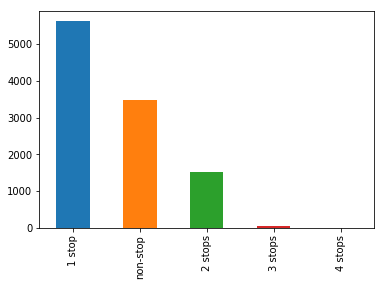

In [30]:
train_data['Total_Stops'].value_counts().plot(kind='bar')

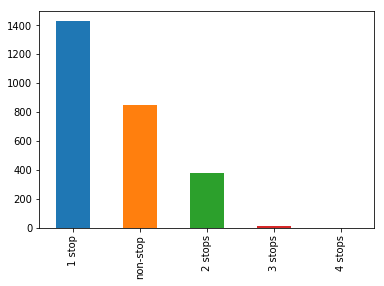

In [31]:
test_data['Total_Stops'].value_counts().plot(kind='bar')

Dropping Columns, Null Values And Trujet 

In [32]:
train_data.drop(labels=['Route','Dep_Time','Arrival_Time'],inplace=True,axis=1)
test_data.drop(labels=['Route','Dep_Time','Arrival_Time'],inplace=True,axis=1)
train_data.drop(labels=['Additional_Info'],inplace=True,axis=1)
test_data.drop(labels=['Additional_Info'],inplace=True,axis=1)
train_data.dropna(inplace=True)
train_data.drop(train_data[train_data['Airline']=='Trujet'].index,inplace=True)

In [33]:
train_data['Destination']=train_data['Destination']+'d'
test_data['Destination']=test_data['Destination']+'d'

In [34]:
train_data['Total_Stops'].value_counts()

1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
for i in train_data.drop(labels=['Price','Duration'],axis=1).columns:
    col=pd.get_dummies(train_data[i])
    train_data=pd.concat([train_data,col],axis=1)
    train_data.drop(labels=i,axis=1,inplace=True)
    
    
for i in test_data.drop(labels=['Duration'],axis=1).columns:
    col=pd.get_dummies(test_data[i])
    test_data=pd.concat([test_data,col],axis=1)
    test_data.drop(labels=i,axis=1,inplace=True)    

In [37]:
#test_data['1 Short layover']=np.zeros((len(test_data),1))
#test_data['2 Long layover']=np.zeros((len(test_data),1))  
#test_data['No Info']=np.zeros((len(test_data),1)) 
#test_data['Red-eye flight']=np.zeros((len(test_data),1)) 

In [38]:
train_data.shape

(10681, 38)

In [39]:
test_data.shape

(2671, 37)

In [40]:
test_data=test_data[train_data.drop('Price',axis=1).columns]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X=train_data.drop('Price',axis=1)
y=train_data['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train)*100)
print(lr.score(X_test,y_test)*100)

61.449450418261755
60.41454636229214


In [44]:
from sklearn.tree import DecisionTreeRegressor
t=DecisionTreeRegressor(max_depth=7)
t.fit(X_train,y_train)
print(t.score(X_train,y_train))
print(t.score(X_test,y_test))

0.6771211363222946
0.6325860877349725


In [45]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8010, 37) (8010,)
(2671, 37) (2671,)


In [46]:
from keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop

In [47]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)
X_train.to_csv('Train_data_processed.csv')
X_val.to_csv('Validation_data_processed.csv')
pd.DataFrame(data=y_train).to_csv('train_labels.csv')
pd.DataFrame(data=y_val).to_csv('validation_lables.csv')

(7209, 37) (7209,)
(801, 37) (801,)
(2671, 37) (2671,)


In [48]:
#X_train.to_csv('Train_data_processed.csv')
#X_val.to_csv('Validation_data_processed.csv')
#len(pd.read_csv('Validation_data_processed.csv'))
#y_train.to_csv('train_labels.csv')
#pd.read_csv('Train_data_processed.csv',index_col='Unnamed: 0').values
#pd.read_csv('train_labels.csv').shape
#y_val.to_csv('validation_lables.csv')

In [49]:
from hyperopt import Trials,STATUS_OK,tpe
from hyperas import optim
from hyperas.distributions import choice,uniform

In [50]:
def data():
    X_train=pd.read_csv('Train_data_processed.csv',index_col='Unnamed: 0').values
    y_train=pd.read_csv('train_labels.csv',index_col='Unnamed: 0')['Price'].values
    X_val=pd.read_csv('Validation_data_processed.csv',index_col='Unnamed: 0').values
    y_val=pd.read_csv('validation_lables.csv',index_col='Unnamed: 0')['Price'].values
    return X_train,y_train,X_val,y_val

In [51]:
def model(X_train,y_train,X_val,y_val):
    model=Sequential()
    model.add(Dense({{choice([128,256,512,1024])}},input_shape=(37,),kernel_initializer='normal'))
    model.add(Activation({{choice(['relu','tanh','sigmoid'])}}))
    model.add(Dropout({{uniform(0,1)}}))
    
    model.add(Dense({{choice([128,256,512,1024])}},kernel_initializer='normal'))
    model.add(Activation({{choice(['relu','tanh','sigmoid'])}}))
    model.add(Dropout({{uniform(0,1)}}))
    
    model.add(Dense({{choice([128,256,512,1024])}},kernel_initializer='normal'))
    model.add(Activation({{choice(['relu','tanh','sigmoid'])}}))
    model.add(Dropout({{uniform(0,1)}}))
    
    model.add(Dense({{choice([128,256,512,1024])}},kernel_initializer='normal'))
    model.add(Activation({{choice(['relu','tanh','sigmoid'])}}))
    model.add(Dropout({{uniform(0,1)}}))
   
    if {{choice(['four','five'])}}=='five':
        model.add(Dense({{choice([128,256,512,1024])}},kernel_initializer='normal'))
        model.add(Activation({{choice(['relu','tanh','sigmoid'])}}))
        model.add(Dropout({{uniform(0,1)}}))
        
    model.add(Dense(1))    
    
    adam=keras.optimizers.Adam(lr={{choice([10**(-3),10**(-2),10**(-1)])}})
    rmsprop=keras.optimizers.RMSprop(lr={{choice([10**(-3),10**(-2),10**(-1)])}})
    sgd=keras.optimizers.SGD(lr={{choice([10**(-3),10**(-2),10**(-1)])}})
    
    choiceval={{choice(['adam','rmsprop','sgd'])}}
    if choiceval=='adam':
        optim=adam
    elif choiceval=='rmsprop':
        optim=rmsprop
    else :
        optim=sgd
        
    model.compile(loss='mae',optimizer=optim)
    
    model.fit(X_train,y_train,batch_size={{choice([128,256,512])}},
              epochs=20,
              verbose=2,
              validation_data=(X_val,y_val))
    score=model.evaluate(X_val,y_val,verbose=2)
    return {'loss': score, 'status': STATUS_OK, 'model': model}
    

In [52]:
X_train,y_train,X_val,y_val=data()
best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                      notebook_name='Code')

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from tqdm import tqdm
except:
    pass

try:
    import keras
except:
    pass

try:
    import sklearn
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.linear_model import LinearRegression
except:
    pass

try:
    from sklearn.tree import DecisionTreeRegressor
except:
    pass

try:
    from keras.layers import Dense, Activation, Dropout
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.optimizers import Adam, RMSprop
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

>>> Hyperas search space:

def get_space():
 

 - 1s - loss: 4145.1098 - val_loss: 3730.4938                              

Epoch 10/20                                                                
 - 1s - loss: 4136.8073 - val_loss: 3782.4499                              

Epoch 11/20                                                                
 - 1s - loss: 4100.1504 - val_loss: 3799.2071                              

Epoch 12/20                                                                
 - 1s - loss: 4078.0635 - val_loss: 3746.0738                              

Epoch 13/20                                                                
 - 1s - loss: 4117.0904 - val_loss: 3875.7228                              

Epoch 14/20                                                                
 - 1s - loss: 4057.2004 - val_loss: 3837.0849                              

Epoch 15/20                                                                
 - 1s - loss: 4049.3299 - val_loss: 3940.6716                              

Epoch

 - 1s - loss: 4687.2165 - val_loss: 3954.1981                              

Epoch 2/20                                                                 
 - 1s - loss: 3796.0112 - val_loss: 3706.5907                              

Epoch 3/20                                                                 
 - 2s - loss: 4099.9804 - val_loss: 3730.4858                              

Epoch 4/20                                                                 
 - 1s - loss: 3976.6013 - val_loss: 3769.6620                              

Epoch 5/20                                                                 
 - 1s - loss: 3956.0032 - val_loss: 3791.1372                              

Epoch 6/20                                                                 
 - 1s - loss: 4105.5571 - val_loss: 3690.9780                              

Epoch 7/20                                                                 
 - 1s - loss: 4056.4247 - val_loss: 4090.5096                              

Epoch

model=Sequential()
model.add(Dense(1024,input_shape=(37,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Dense(1))
model.summary()

In [53]:
#model.compile(optimizer='rmsprop',loss=['mean_squared_error'])
#z=model.fit(x=X_train,y=y_train,batch_size=32,epochs=100,verbose=2,validation_data=(X_test,y_test))

In [54]:
#plt.figure(figsize=(10,7))
#plt.plot(z.history['loss'],'r',label='Training_loss')
#plt.plot(z.history['val_loss'],'b',label='Test_loss')
#plt.legend()
#plt.show()

In [55]:
print(best_model)

In [56]:
print(best_run)

{'Activation': 1, 'Activation_1': 0, 'Activation_2': 2, 'Activation_3': 0, 'Activation_4': 1, 'Dense': 3, 'Dense_1': 1, 'Dense_2': 2, 'Dense_3': 1, 'Dense_4': 2, 'Dropout': 0.4350595881468875, 'Dropout_1': 0.3720818863636862, 'Dropout_2': 0.7933149323928275, 'Dropout_3': 0.5373718127140085, 'Dropout_4': 0, 'Dropout_5': 0.9532739136720357, 'batch_size': 2, 'choiceval': 1, 'lr': 2, 'lr_1': 2, 'lr_2': 0}


In [64]:
model=Sequential()
model.add(Dense(1024,input_shape=(37,),activation='tanh'))
model.add(Dropout(0.43))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.37))
model.add(Dense(512,activation='sigmoid'))
model.add(Dropout(0.79))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.53))
model.add(Dense(512,activation='tanh'))
model.add(Dropout(0))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 1024)              38912     
_________________________________________________________________
dropout_29 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
__________

In [66]:
model.compile(RMSprop(lr=0.1),loss='mae')

In [70]:
z=model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=2,validation_data=(X_test,y_test))

Train on 7209 samples, validate on 2671 samples
Epoch 1/10
 - 2s - loss: 3603.3263 - val_loss: 3646.4562
Epoch 2/10
 - 2s - loss: 3602.3784 - val_loss: 3644.4810
Epoch 3/10
 - 1s - loss: 3602.8445 - val_loss: 3646.3846
Epoch 4/10
 - 1s - loss: 3602.9807 - val_loss: 3646.6030
Epoch 5/10
 - 2s - loss: 3603.2573 - val_loss: 3650.1463
Epoch 6/10
 - 1s - loss: 3603.1230 - val_loss: 3644.9935
Epoch 7/10
 - 2s - loss: 3603.2631 - val_loss: 3645.2619
Epoch 8/10
 - 1s - loss: 3603.1816 - val_loss: 3648.3008
Epoch 9/10
 - 1s - loss: 3603.1729 - val_loss: 3651.1869
Epoch 10/10
 - 1s - loss: 3601.6592 - val_loss: 3643.8358


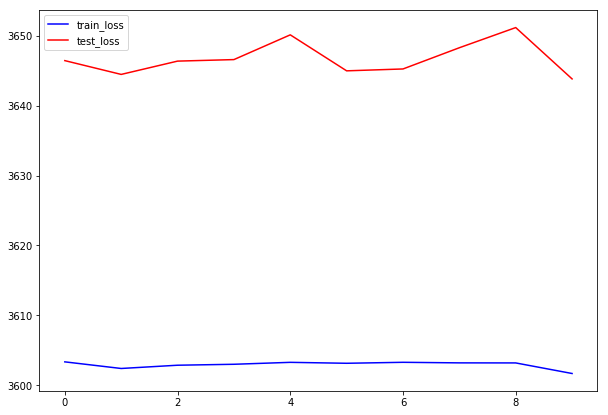

In [74]:
plt.figure(figsize=(10,7))
plt.plot(z.history['loss'],'b',label='train_loss')
plt.plot(z.history['val_loss'],'r',label='test_loss')
plt.legend()
plt.show()